# Trabalho Final - Análise de Dados com Python



### Enunciado

A partir dos dados housing.csv (mais informacoes [aqui](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)), realize toda análise exploratória necessária e prepare os dados para algoritmos de machine learning usando a Scikit-Learn. Treine um modelo de regressão linear que prediga a variável meta (median_house_value) e cujo valor de RMSE seja menor ou igual a 69000. 

<span style="color:blue;">EDA_Step 1 - Getting the data</span>


In [1]:
# leitura dos dados e import de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

housing = pd.read_csv('housing.csv')
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


1. Importing data and libs.


<span style="color:blue;">EDA_Step 2 - Data Cleaning</span>


2. Let's start with the info() method.


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


3. As we can see after using the info() method, there are some missing values in index column 4 (total_bedrooms)

In [3]:
## realizando o drop onde existe registros faltantes conforme analise

df_total_bedrooms_null = housing[housing['total_bedrooms'].isnull()].index
housing.drop(df_total_bedrooms_null, inplace=True)

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


4. Since the number of rows with null values is only 206, we removed them from our dataset.

<span style="color:blue;">EDA_Step 3 - Descriptive statistical analysis</span>



5. Looking at some statistical indicators of the dataset

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<span style="color:blue;">EDA_Step 4 - Treatment of outliers </span> 

5. Lets try to see some informations ploting graphics.

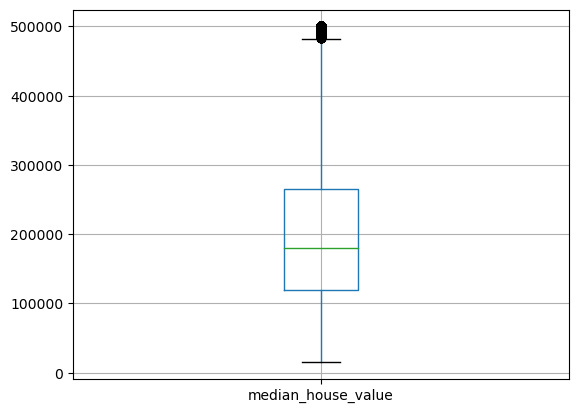

In [5]:
##plotando um boxplot

housing.boxplot(column='median_house_value')
plt.show()

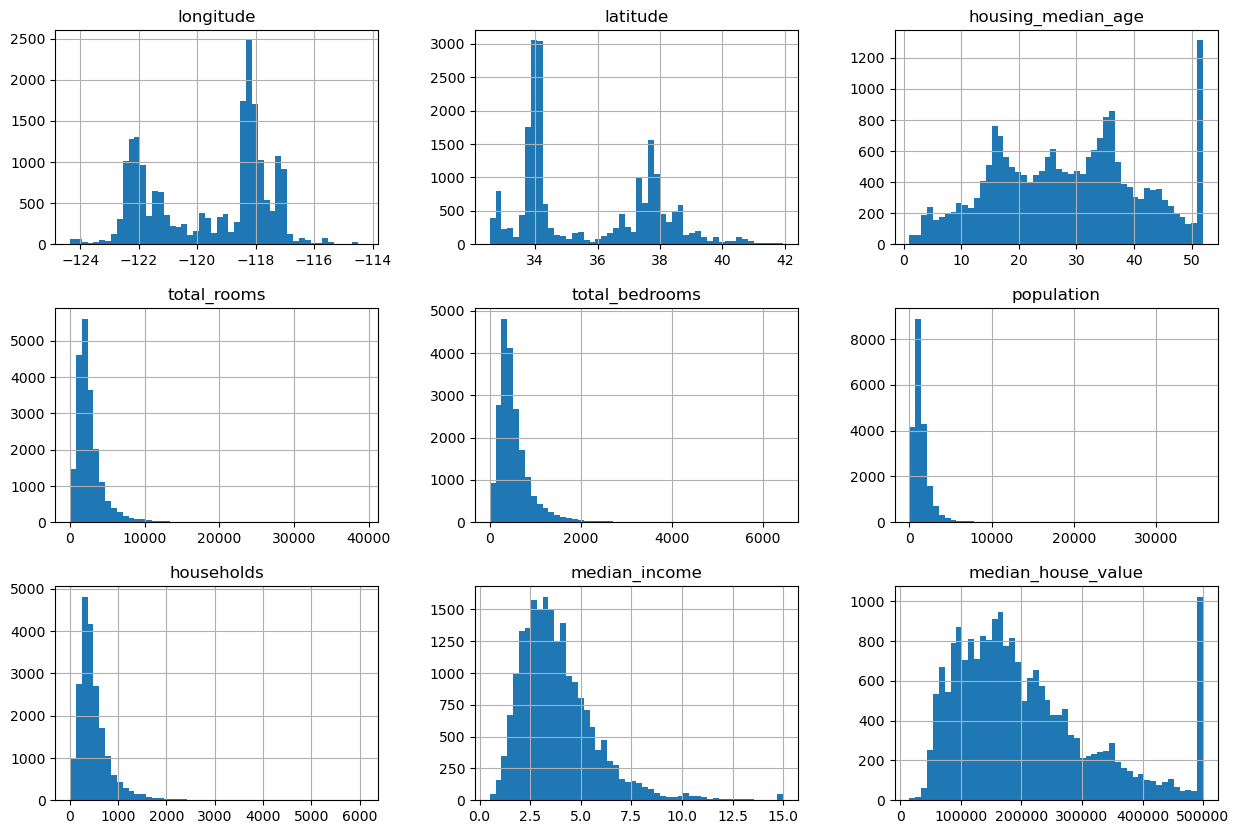

In [6]:
## plotando histogramas 

housing.hist(bins=50, figsize=(15, 10))
plt.show()

In [7]:
## Aplicando a tecnica de IQR para remoção dos outliers.

Q1 = housing['median_house_value'].quantile(0.25)
Q3 = housing['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

housing2 = housing[(housing['median_house_value'] >= Q1 - 1.5 * IQR) & (housing['median_house_value'] <= Q3 + 1.5 * IQR)]
housing2.describe()






,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000
mean,-119.563902,35.655784,28.344158,2620.710930,539.893335,1442.285043,501.303991,3.665475,190802.064949
std,2.005895,2.151468,12.503931,2187.046669,422.650225,1145.780125,383.339200,1.556776,95404.934086
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1440.000000,297.000000,798.000000,282.000000,2.522300,116100.000000
50%,-118.510000,34.270000,28.000000,2110.000000,437.000000,1181.000000,411.000000,3.442700,173200.000000
75%,-117.990000,37.730000,37.000000,3119.000000,648.000000,1746.000000,606.000000,4.572400,246400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,482200.000000


6. After detecting some Outliers, we decided to use the IQR Technique.

<span style="color:blue;">EDA_Step 5 - Features Engineering  </span> 

7. Applicating Label Encoding in the Feature 'ocean_proximity'.

In [8]:
housing2['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
## aplicando label encoding em  uma das variaveis do tipo string(variável categórica)
## Aqui, após várias verificações decidimos subdividir a váriável em duas categorias de 0 e 1
## "INLAND e ISLAND = 0 " e "NEAR BAY, <1H OCEAN, NEAR OCEAN = 1".
#Com isso conseguimos aumentar ainda mais a correlação das variáveis e impactando positivamente no RMSE

housing2['ocean_proximity'] = housing2['ocean_proximity'].map({'NEAR BAY': 1, '<1H OCEAN': 1, 'INLAND': 0, 'NEAR OCEAN': 1, 'ISLAND': 0})



C:\Users\user\AppData\Local\Temp\ipykernel_1584\4248622675.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing2['ocean_proximity'] = housing2['ocean_proximity'].map({'NEAR BAY': 1, '<1H OCEAN': 1, 'INLAND': 0, 'NEAR OCEAN': 1, 'ISLAND': 0})


In [10]:
housing2['ocean_proximity'].unique()

array([1, 0], dtype=int64)

<span style="color:blue;">EDA_Step 6 - Features Analysis </span> 

8. Trying to get some insights from the CORR between the features.

In [11]:
correlação = housing2.corr(method='pearson')

correlação

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.923983,-0.102982,0.045519,0.070550,0.102073,0.057417,-0.010923,-0.046874,0.061235
latitude,-0.923983,1.000000,0.006967,-0.034247,-0.068627,-0.114527,-0.074176,-0.076198,-0.149456,-0.356237
housing_median_age,-0.102982,0.006967,1.000000,-0.371982,-0.328113,-0.294317,-0.310047,-0.197132,0.062070,0.231623
total_rooms,0.045519,-0.034247,-0.371982,1.000000,0.934352,0.859769,0.921801,0.226240,0.146601,-0.032917
total_bedrooms,0.070550,-0.068627,-0.328113,0.934352,1.000000,0.879267,0.979089,0.024747,0.078678,0.008465
population,0.102073,-0.114527,-0.294317,0.859769,0.879267,1.000000,0.909164,0.045606,0.016981,0.029553
households,0.057417,-0.074176,-0.310047,0.921801,0.979089,0.909164,1.000000,0.049453,0.098364,0.041623
median_income,-0.010923,-0.076198,-0.197132,0.226240,0.024747,0.045606,0.049453,1.000000,0.644410,0.217649
median_house_value,-0.046874,-0.149456,0.062070,0.146601,0.078678,0.016981,0.098364,0.644410,1.000000,0.501435
ocean_proximity,0.061235,-0.356237,0.231623,-0.032917,0.008465,0.029553,0.041623,0.217649,0.501435,1.000000


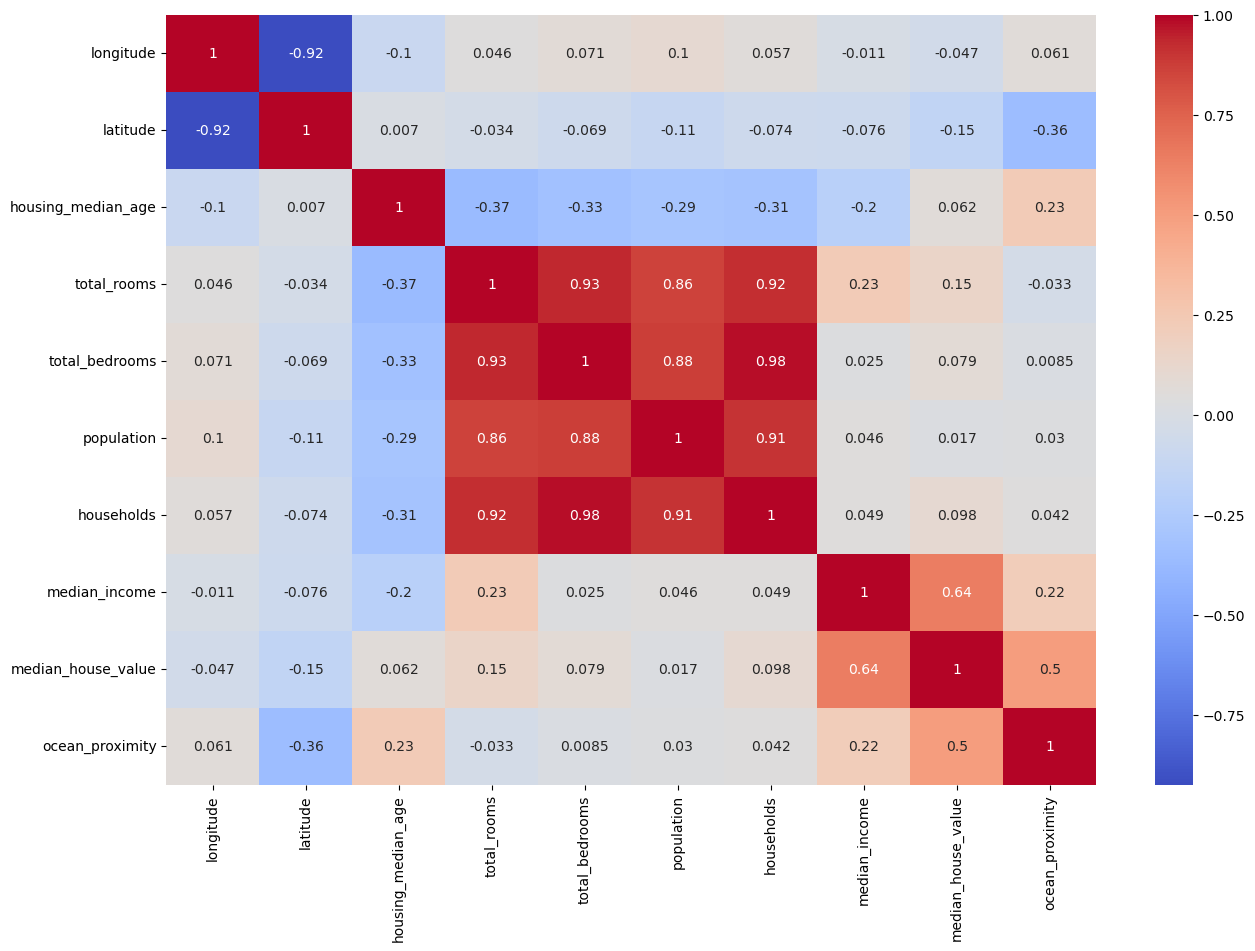

In [12]:
## Realizando um plot da correlação para facilitar a visualização da correlação

correlacao = housing2.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.show()

<span style="color:blue;">EDA_Step 7 - Database separation </span> 

9. Separating our Database for training and test the model

In [13]:
## Dividindo a base de dados entre Train e Test, onde Test representa 20% do tamanho base. 
## X representa as Features e Y a variavel Target.

X_train, X_test, y_train, y_test = train_test_split(housing2, housing2['median_house_value'], test_size=0.2, random_state=40)

In [14]:
X_train.drop(['median_house_value'], inplace=True, axis=1)
X_test.drop(['median_house_value'], inplace=True, axis=1)

<span style="color:blue;"> Training and testing a Linear Regression Model</span> 

In [15]:
## Instanciando a variavél para a aplicação do modelo de regressão linear, onde elá irá receber X_train e Y_train
model = LinearRegression()
model.fit(X_train, y_train)

## Criando a variável de predição, onde utilizaremos o X_test como dados de entrada
y_pred = model.predict(X_test)


## Validando abaixo a qualidade do modelo usando as métricas MSE e RMSE.
mse = mean_squared_error(y_test, y_pred)
print("Valor do MSE: ",mse)

RMSE = np.sqrt(mse)
print("Valor do RMSE: ", RMSE)


Valor do MSE:  3244566649.9328938
Valor do RMSE:  56961.09768897448
